In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
crops = pd.read_csv("/content/soil_measures.csv")

In [7]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [8]:
crops.shape

(2200, 5)

In [9]:
crops.crop.value_counts()

,count
crop,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [10]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [11]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [12]:
# Splitting the data
features = ["N", "P", "K", "ph"]

X_train, X_test, y_train, y_test = train_test_split(crops[features], crops.crop, test_size=0.2, random_state=42)

In [13]:
# Predict the crop using each feature
model_performance = {}
for feature in ['N', 'P', 'K', 'ph']:
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    model_performance[feature] = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {model_performance[feature]}")

F1-score for N: 0.1020973317588429
F1-score for P: 0.13310868837820025
F1-score for K: 0.24802511765923194
F1-score for ph: 0.0458225366614312


In [14]:
# Estimating feature correlation
correlations = crops[features].corr()
correlations

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


<Axes: >

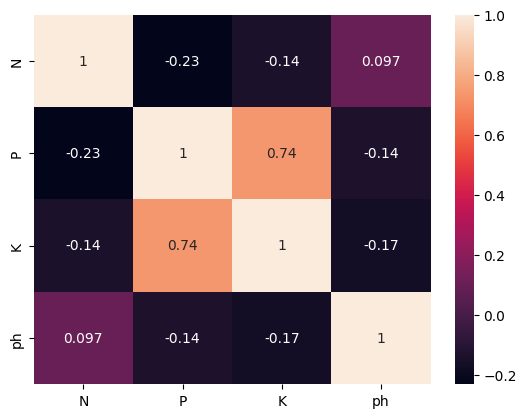

In [15]:
sns.heatmap(correlations, annot=True)

In [16]:
# Select the final features for the model
final_features = ['K', 'N', 'ph']

# Producing a final model
X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops["crop"], test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
print(model_performance)

0.565077845525084


In [18]:
# 🌾 Define prediction function
def predict_crop(N, P, K, ph):
    """
    Predicts the crop based on soil nutrient values and pH.
    Args:
        N (float): Nitrogen value.
        P (float): Phosphorus value.
        K (float): Potassium value.
        ph (float): pH value.
    Returns:
        str: The predicted crop.
    """
    # Order of columns must match final_features
    input_data = pd.DataFrame([[K, N, ph]], columns=final_features)
    predicted_crop = log_reg.predict(input_data)
    return predicted_crop[0]

# 🧪 Test the prediction function
N_val = 90
P_val = 42
K_val = 37
pH_val = 6.5

predicted_crop = predict_crop(N_val, P_val, K_val, pH_val)
print(f"🌱 Predicted Crop: {predicted_crop}")

🌱 Predicted Crop: rice
